# MLP architecture comparison

This notebook discusses predictions made using a selection of different MLP architectures, primarily hidden layer sizes. Predictive model A and B are used, as defined in the thesis.

In general, the model architecture has the following effect on model performance:
- Too few neurons or layers may make the model incapable of discovering nonlinear and/or  deep patterns within the dataset, and thus underfit
- Too many neurons or layers may make the model discover underlying patterns that are complex, but not relevant to the problem, and thus overfit.

Finding the optimal model architecture and model hyperparameters generally requires extensive trial and error, e.g. in the form of a grid search. For this comparison, some hyperparameters known to work well on the relevant datasets are chosen (i.e. the library defaults).

In [1]:
# %load 3_mlp_arch_comp.py
import src.core as mlModule
import src.core_configs as configs

Using TensorFlow backend.


In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, score=True):
    mlModule.initModels(modelList)
    mlModule.trainModels(retrain)
    
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlModule.predictWithModels(
        plot=plot,
        score=score,
    )

In [3]:
def pred(facility, model, resolution):
    filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig(facility, model, resolution)

    df = mlModule.initDataframe(filename, columns, irrelevantColumns)
    df_train, df_test = mlModule.getTestTrainSplit(traintime, testtime)
    X_train, y_train, X_test, y_test = mlModule.getFeatureTargetSplit(targetColumns)

    mlp_1x_16 = mlModule.MLP('MLP 1x16'+' mod'+model, layers=[16], dropout=0.2, epochs=1000)
    mlp_1x_32 = mlModule.MLP('MLP 1x32'+' mod'+model, layers=[32], dropout=0.2, epochs=1000)
    mlp_1x_64 = mlModule.MLP('MLP 1x64'+' mod'+model, layers=[64], dropout=0.2, epochs=1000)
    mlp_1x_128 = mlModule.MLP('MLP 1x128'+' mod'+model, layers=[128], dropout=0.2, epochs=1000)

    mlp_2x_16 = mlModule.MLP('MLP 2x16'+' mod'+model, layers=[16, 16], dropout=0.2, epochs=1000)
    mlp_2x_32 = mlModule.MLP('MLP 2x32'+' mod'+model, layers=[32, 32], dropout=0.2, epochs=1000)
    mlp_2x_64 = mlModule.MLP('MLP 2x64'+' mod'+model, layers=[64, 64], dropout=0.2, epochs=1000)
    mlp_2x_128 = mlModule.MLP('MLP 2x128'+' mod'+model, layers=[128, 128], dropout=0.2, epochs=1000)

    linear_cv = mlModule.Linear_Regularized('Linear rCV'+' mod'+model)

    ensemble = mlModule.Ensemble('MLP 1x128 + Linear'+' mod'+model, [mlp_1x_128, linear_cv])
    ensemble2 = mlModule.Ensemble('MLP 2x64 + Linear'+' mod'+model, [mlp_2x_64, linear_cv])

    modelList = [
        linear_cv,
        mlp_1x_16,
        mlp_1x_32,
        mlp_2x_16,
        mlp_2x_32,
    ]

    initTrainPredict(modelList)

    modelList = [
        linear_cv,
        mlp_1x_64,
        mlp_1x_128,
        mlp_2x_64,
        mlp_2x_128,
    ]

    initTrainPredict(modelList)

    modelList = [
        linear_cv,
        ensemble,
        ensemble2,
    ]

    initTrainPredict(modelList)

# Dataset D, predictive model A

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.14580221 -0.9

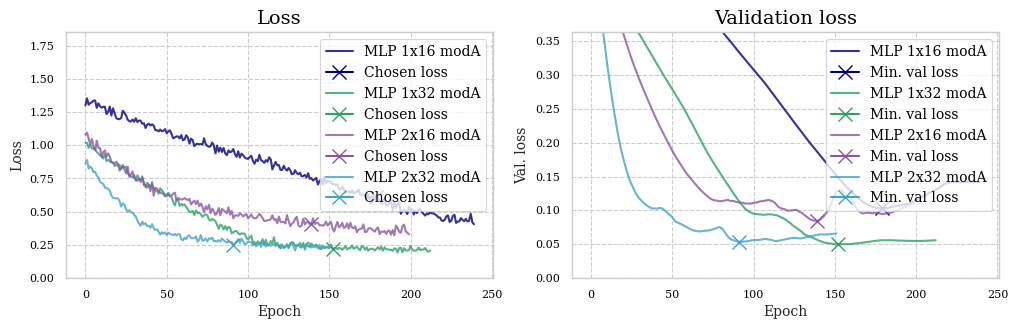

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.9947   |   0.8842   |
|  MLP 1x16 modA  |    0.5937   |   0.3219   |
|  MLP 1x32 modA  |    0.9884   |   0.6677   |
|  MLP 2x16 modA  |    0.9276   |   0.7772   |
|  MLP 2x32 modA  |    0.9853   |   0.6622   |
+-----------------+-------------+------------+


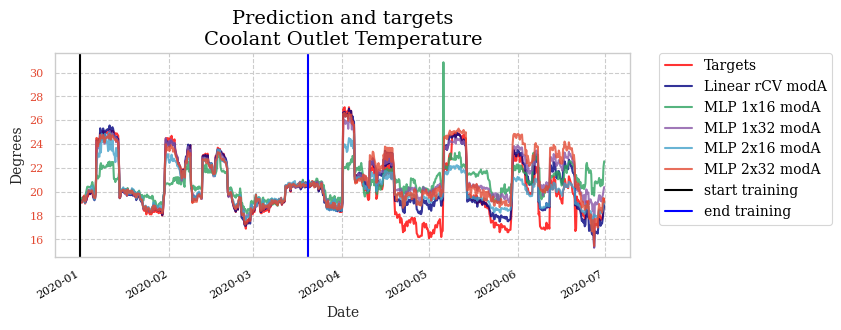

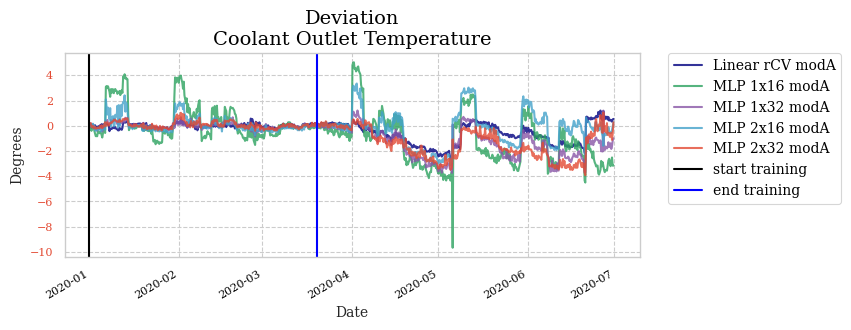

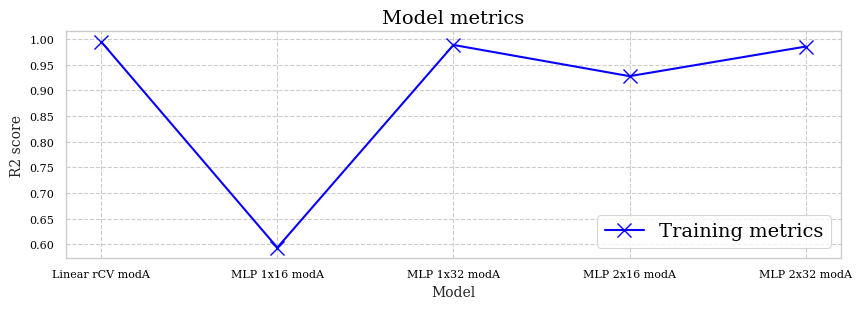

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
Model MLP 1x64 modA was loaded from file
Model MLP 1x128 modA was loaded from file
Model MLP 2x64 modA was loaded from file
Model MLP 2x128 modA was loaded from file
+----------------+-----------+-------------+---------------+--------+
|     Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------+-----------+-------------+---------------+--------+
| MLP 1x64 modA  |  0.119441 |   0.147331  |    0.045338   |  360   |
| MLP 1x128 modA |  0.07582  |   0.086469  |    0.038886   |  480   |
| MLP 2x64 modA  |  0.119212 |   0.147627  |     0.0457    |  229   |
| MLP 2x128 modA |  0.116057 |   0.149504  |    0.039393   |  107   |
+----------------+-----------+-------------+---------------+--------+


Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.9947   |   0.8842   |
|  MLP 1x64 modA  |    0.9955   |   0.7616   |
|  MLP 1x128 modA |    0.9978   |   0.7702   |
|  MLP 2x64 modA  |    0.9966   |   0.7911   |
|  MLP 2x128 modA |    0.9962   |   0.7028   |
+-----------------+-------------+------------+


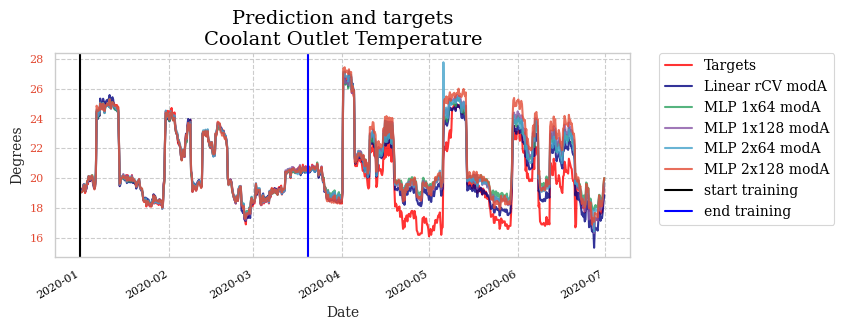

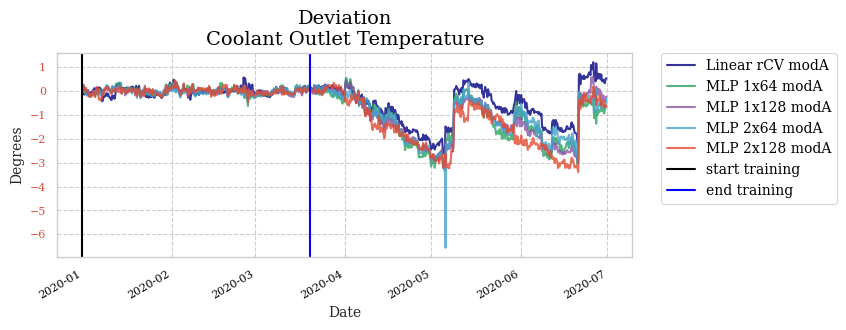

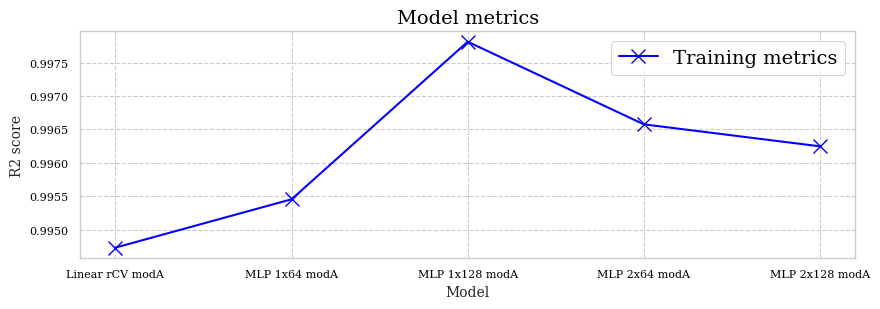

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
Model MLP 1x128 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble MLP 1x128 + Linear modA
    Trained weights for Linear rCV modA:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
    Trained weights for Linear model of ensemble:
[[ 1.04687091 -0.04784471]]
Model MLP 2x64 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble MLP 2x64 + Linear modA
    Trained weights for Linear rCV modA:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
    Trained weights for Linear model of ensemble:
[[0.76342136 0.2353263 ]]
+-----------------------------------------+-----------+-------------+---------------+--------+
|                  Model                  | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------------------+-----------+-------------+---------------+--------+
| MLP 1x128

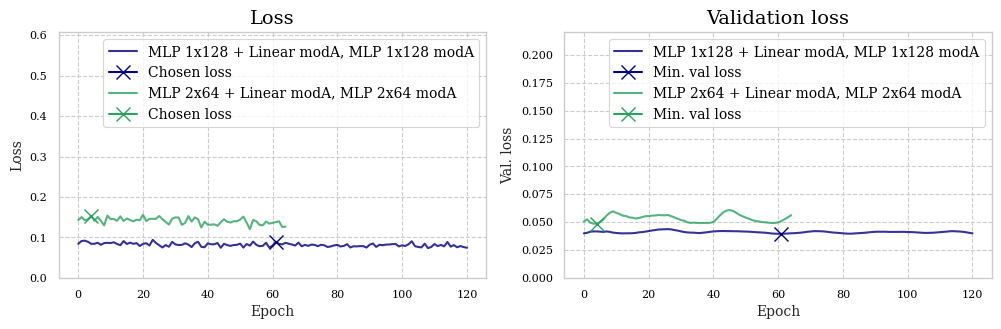

Model prediction scores
+-------------------------+-------------+------------+
|          Model          | Train score | Test score |
+-------------------------+-------------+------------+
|     Linear rCV modA     |    0.9947   |   0.8842   |
| MLP 1x128 + Linear modA |    0.9982   |   0.7796   |
|  MLP 2x64 + Linear modA |    0.9968   |   0.7711   |
+-------------------------+-------------+------------+


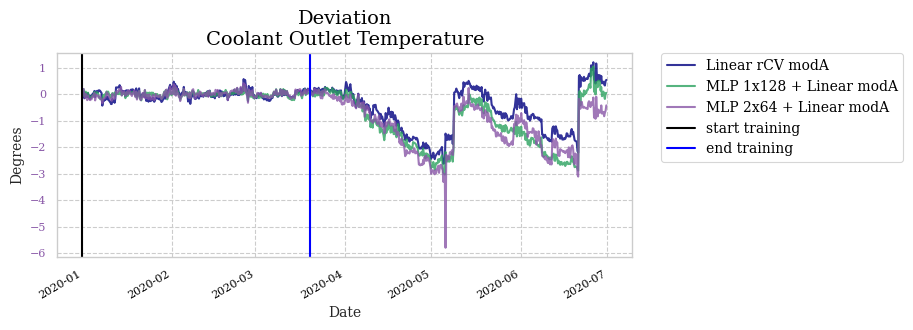

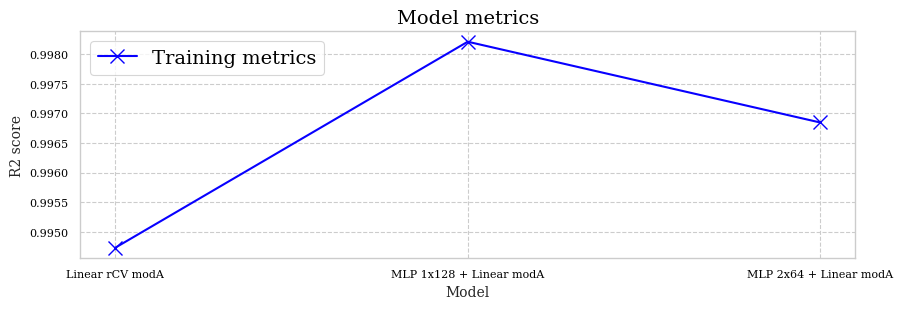

In [4]:
pred('D', 'A', '30min')

In [5]:
mlModule.reset()

# Dataset D, predictive model B

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature
Col. 5 : 50TV001 - Coolant Valve Opening

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Training model Linear rCV modB
    Trained weight

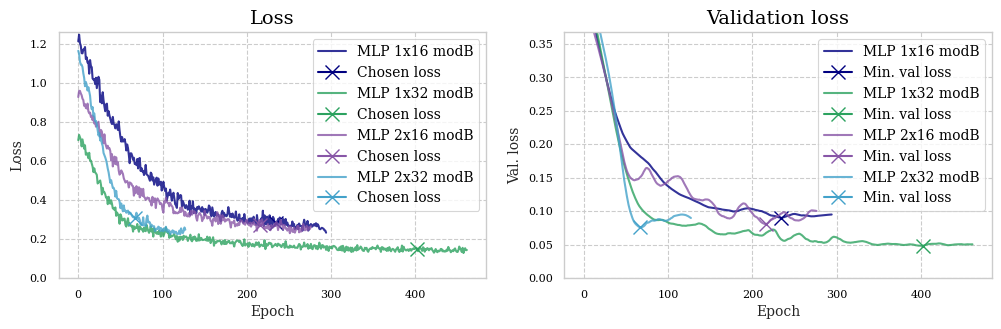

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.9963   |   0.922    |
|  MLP 1x16 modB  |    0.9772   |   0.8521   |
|  MLP 1x32 modB  |    0.9952   |   0.9421   |
|  MLP 2x16 modB  |    0.9685   |   0.8572   |
|  MLP 2x32 modB  |    0.9556   |   0.5468   |
+-----------------+-------------+------------+


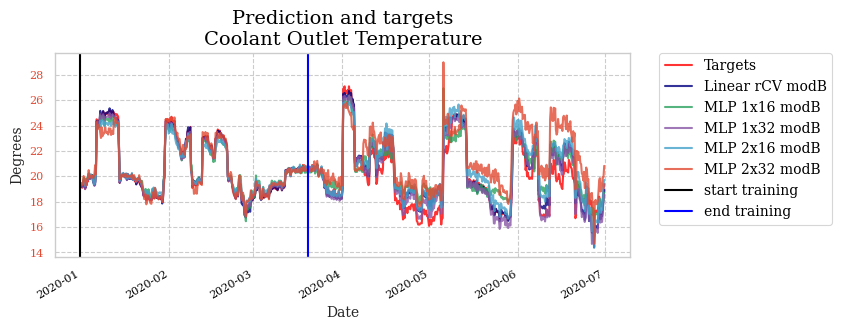

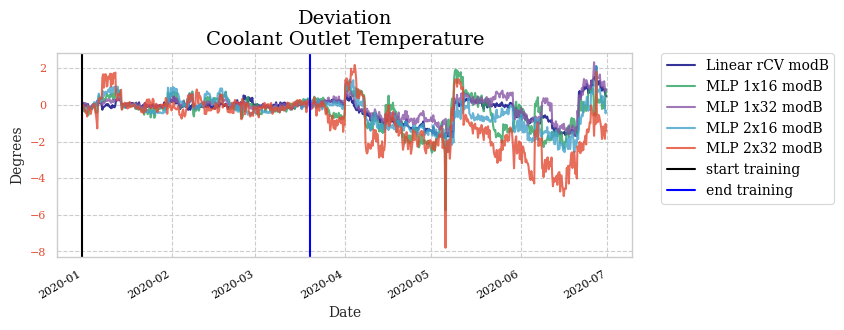

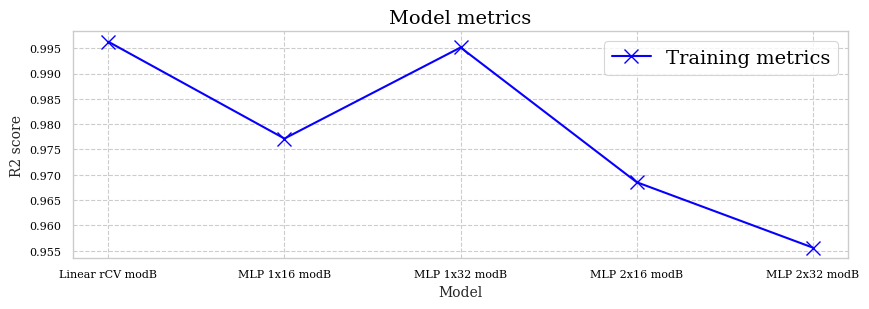

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[-0.08654829 -0.81747171  0.03767963 -0.02416356 -0.18159928]]
Model MLP 1x64 modB was loaded from file
Model MLP 1x128 modB was loaded from file
Model MLP 2x64 modB was loaded from file
Model MLP 2x128 modB was loaded from file
+----------------+-----------+-------------+---------------+--------+
|     Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------+-----------+-------------+---------------+--------+
| MLP 1x64 modB  |  0.115353 |   0.141904  |    0.039884   |  248   |
| MLP 1x128 modB |  0.10073  |   0.115313  |    0.034829   |  188   |
| MLP 2x64 modB  |  0.150948 |   0.250481  |    0.061873   |  104   |
| MLP 2x128 modB |  0.10597  |   0.143734  |    0.046126   |  103   |
+----------------+-----------+-------------+---------------+--------+


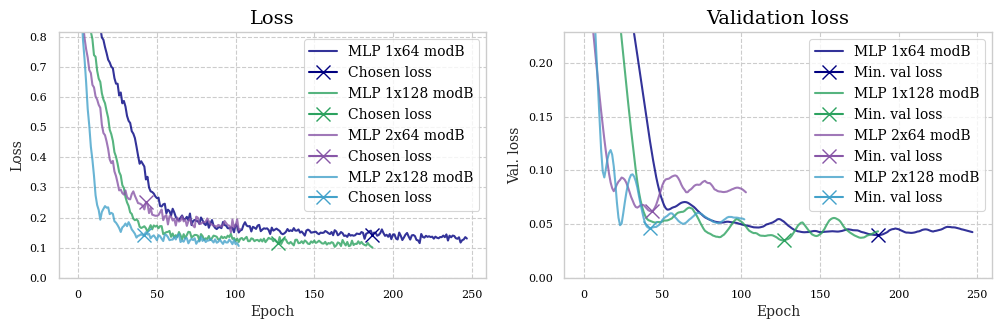

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.9963   |   0.922    |
|  MLP 1x64 modB  |    0.9965   |   0.9158   |
|  MLP 1x128 modB |    0.9977   |   0.9342   |
|  MLP 2x64 modB  |    0.9804   |   0.9052   |
|  MLP 2x128 modB |    0.9949   |   0.7991   |
+-----------------+-------------+------------+


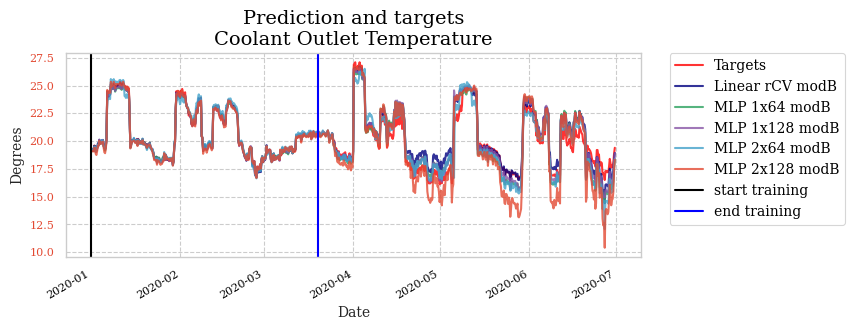

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[-0.08654829 -0.81747171  0.03767963 -0.02416356 -0.18159928]]
Model MLP 1x128 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble MLP 1x128 + Linear modB
    Trained weights for Linear rCV modB:
[[-0.08654829 -0.81747171  0.03767963 -0.02416356 -0.18159928]]
    Trained weights for Linear model of ensemble:
[[0.84581841 0.1534017 ]]
Model MLP 2x64 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble MLP 2x64 + Linear modB
    Trained weights for Linear rCV modB:
[[-0.08654829 -0.81747171  0.03767963 -0.02416356 -0.18159928]]
    Trained weights for Linear model of ensemble:
[[-0.11728154  1.11508451]]
+-----------------------------------------+-----------+-------------+---------------+--------+
|                  Model                  | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------------------+-----------+-------------+-

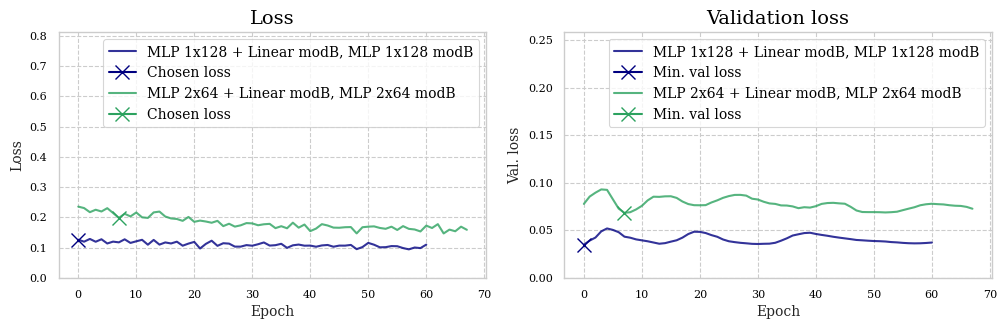

Model prediction scores
+-------------------------+-------------+------------+
|          Model          | Train score | Test score |
+-------------------------+-------------+------------+
|     Linear rCV modB     |    0.9963   |   0.922    |
| MLP 1x128 + Linear modB |    0.9981   |   0.9293   |
|  MLP 2x64 + Linear modB |    0.9964   |   0.9179   |
+-------------------------+-------------+------------+


In [6]:
pred('D', 'B', '30min')

In [7]:
mlModule.reset()

# Dataset F, predictive model A, 30min

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

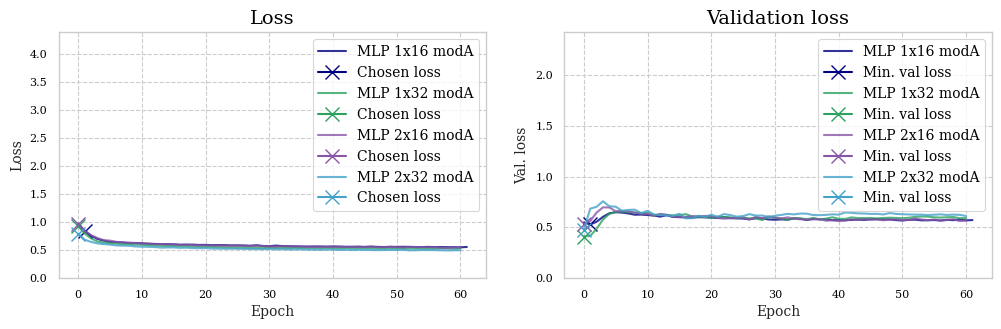

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.3234   |   0.0673   |
|  MLP 1x16 modA  |    0.0662   |  -0.6258   |
|  MLP 1x32 modA  |   -0.0071   |  -1.7149   |
|  MLP 2x16 modA  |    0.0622   |   0.0019   |
|  MLP 2x32 modA  |    0.2338   |   0.1085   |
+-----------------+-------------+------------+


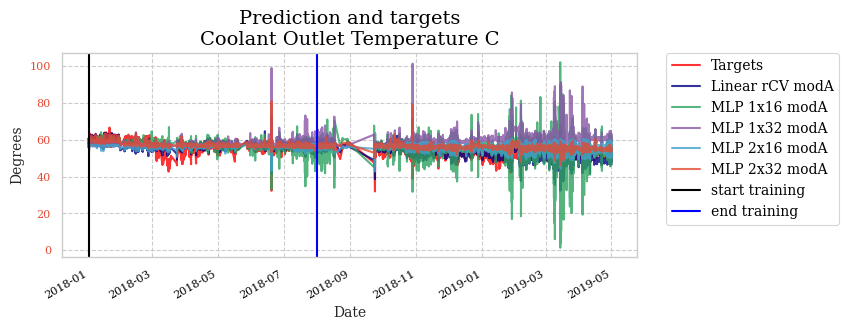

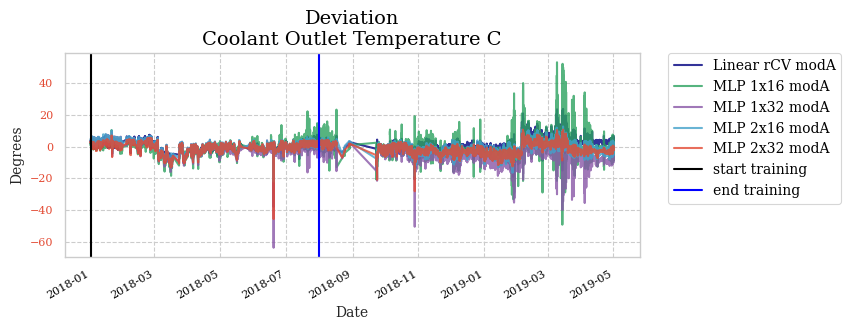

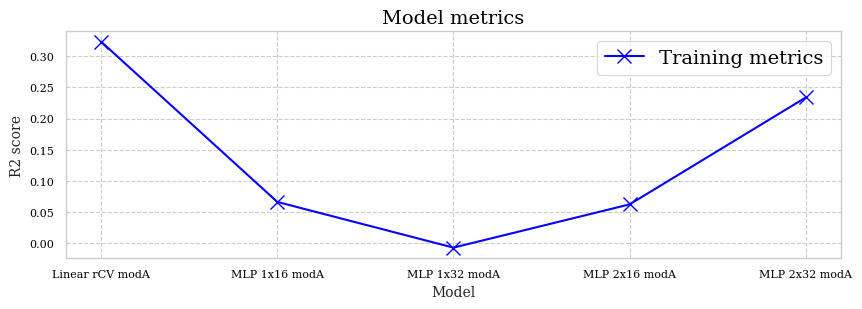

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
Model MLP 1x64 modA was loaded from file
Model MLP 1x128 modA was loaded from file
Model MLP 2x64 modA was loaded from file
Model MLP 2x128 modA was loaded from file
+----------------+-----------+-------------+---------------+--------+
|     Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------+-----------+-------------+---------------+--------+
| MLP 1x64 modA  |  0.513355 |   0.776677  |    0.506517   |   61   |
| MLP 1x128 modA |  0.499012 |   0.52966   |    0.567848   |   71   |
| MLP 2x64 modA  |  0.419908 |   0.449517  |    0.532838   |  115   |
| MLP 2x128 modA |  0.380259 |   0.393474  |    0.424589   |  222   |
+----------------+-----------+-------------+---------------+--------+


Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.3234   |   0.0673   |
|  MLP 1x64 modA  |    0.2432   |   0.2346   |
|  MLP 1x128 modA |    0.427    |   0.099    |
|  MLP 2x64 modA  |    0.5468   |  -0.2377   |
|  MLP 2x128 modA |    0.6261   |   0.2893   |
+-----------------+-------------+------------+


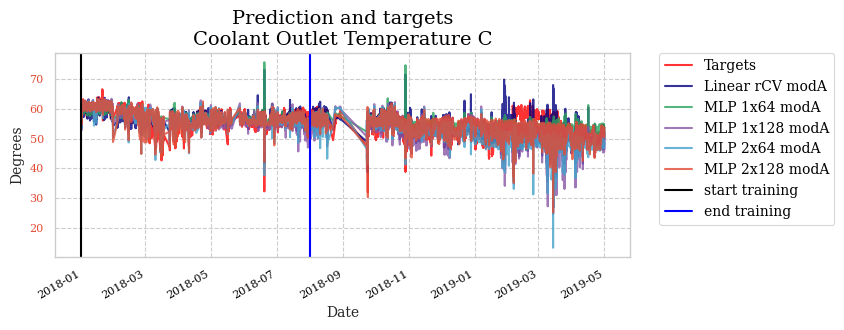

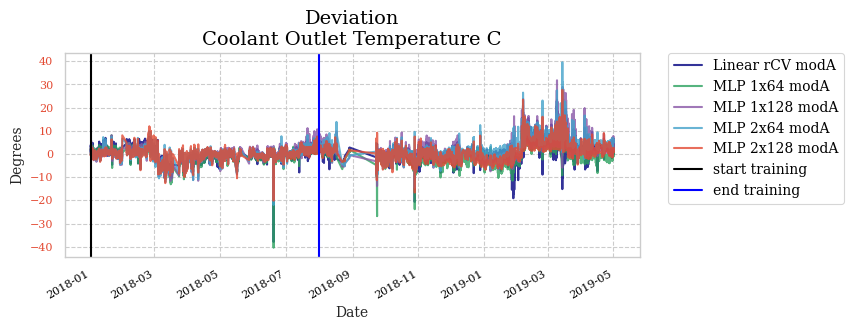

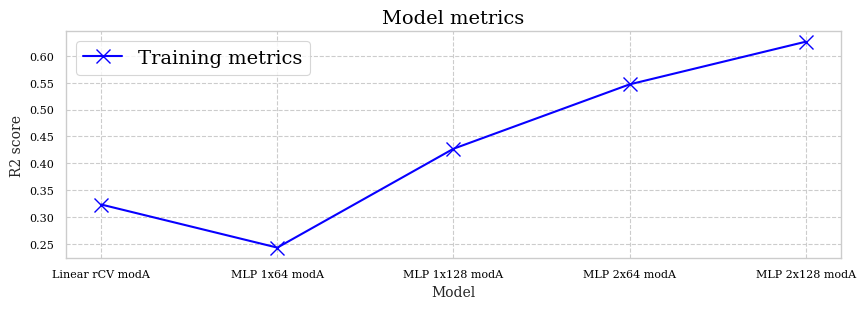

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
Model MLP 1x128 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble MLP 1x128 + Linear modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
    Trained weights for Linear model of ensemble:
[[0.56146942 0.11899111]]
Model MLP 2x64 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble MLP 2x64 + Linear modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
    Trained weights for Linear model of ensemble:
[[0.68883404 0.09509052]]
+-----------------------------------------+-----------+-------------+---------------+--------+
|                  Model                  | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------------------+-----------+-------------+---------------+--------+
| MLP 1x128 +

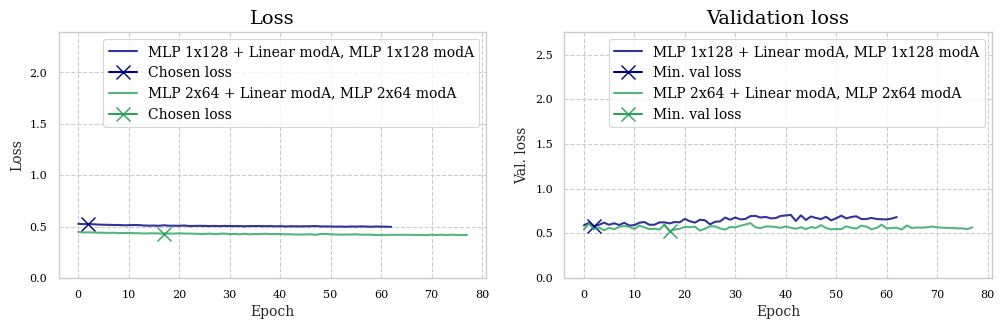

Model prediction scores
+-------------------------+-------------+------------+
|          Model          | Train score | Test score |
+-------------------------+-------------+------------+
|     Linear rCV modA     |    0.3234   |   0.0673   |
| MLP 1x128 + Linear modA |    0.4364   |   0.1371   |
|  MLP 2x64 + Linear modA |    0.5736   |  -0.2051   |
+-------------------------+-------------+------------+


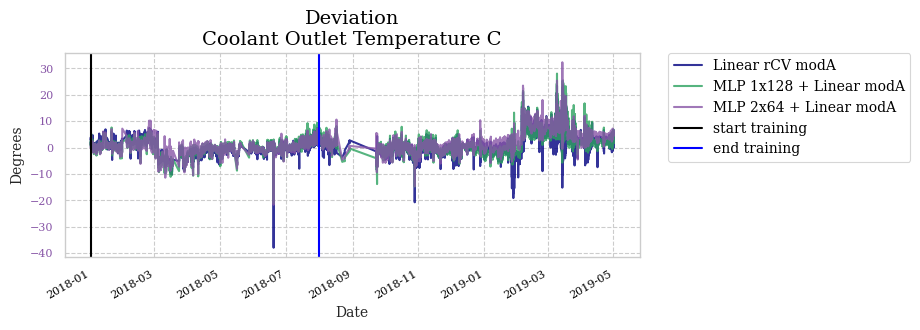

In [8]:
pred('F', 'A', '30min')

In [9]:
mlModule.reset()

# Dataset F, predictive model B, 30min

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.6158   |   0.5949   |
|  MLP 1x16 modB  |    0.1722   |   0.1643   |
|  MLP 1x32 modB  |    0.6712   |   0.2997   |
|  MLP 2x16 modB  |    0.7364   |   0.6097   |
|  MLP 2x32 modB  |    0.8345   |   0.367    |
+-----------------+-------------+------------+


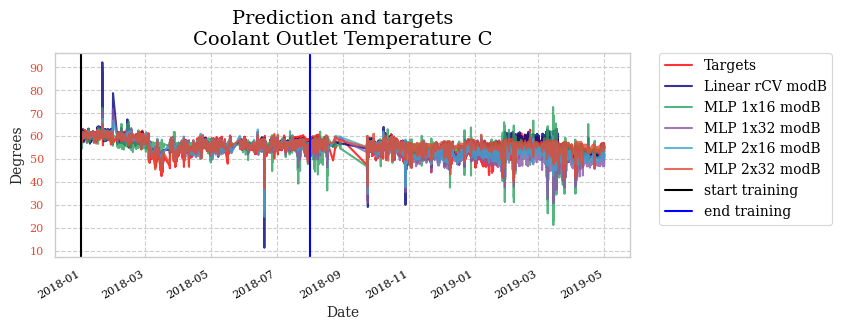

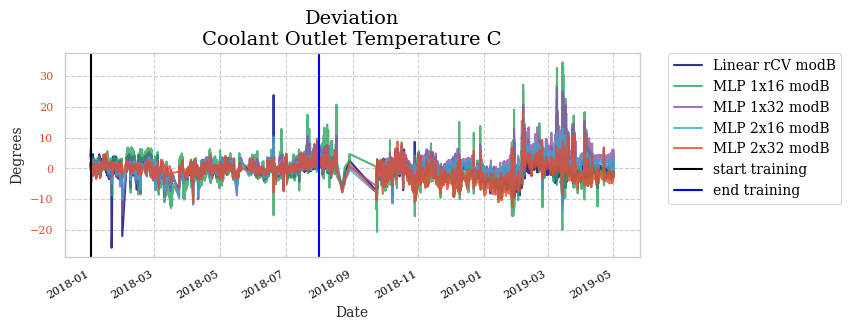

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
Model MLP 1x64 modB was loaded from file
Model MLP 1x128 modB was loaded from file
Model MLP 2x64 modB was loaded from file
Model MLP 2x128 modB was loaded from file
+----------------+-----------+-------------+---------------+--------+
|     Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------+-----------+-------------+---------------+--------+
| MLP 1x64 modB  |  0.336423 |   0.417247  |    0.485379   |   73   |
| MLP 1x128 modB |  0.318541 |   0.390644  |    0.495597   |   73   |
| MLP 2x64 modB  |  0.248396 |   0.260179  |    0.458864   |  204   |
| MLP 2x128 modB |  0.215976 |   0.223706  |    0.43691    |  248   |
+----------------+-----------+-------------+---------------+--------+


Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.6158   |   0.5949   |
|  MLP 1x64 modB  |    0.7025   |   0.5637   |
|  MLP 1x128 modB |    0.7124   |   0.5015   |
|  MLP 2x64 modB  |    0.8424   |   0.4359   |
|  MLP 2x128 modB |    0.8621   |   0.3706   |
+-----------------+-------------+------------+


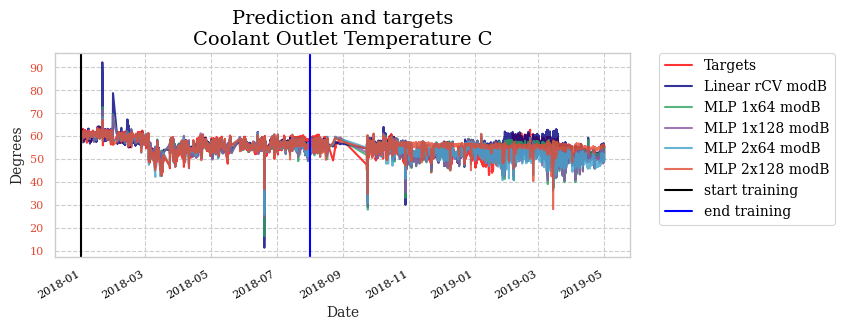

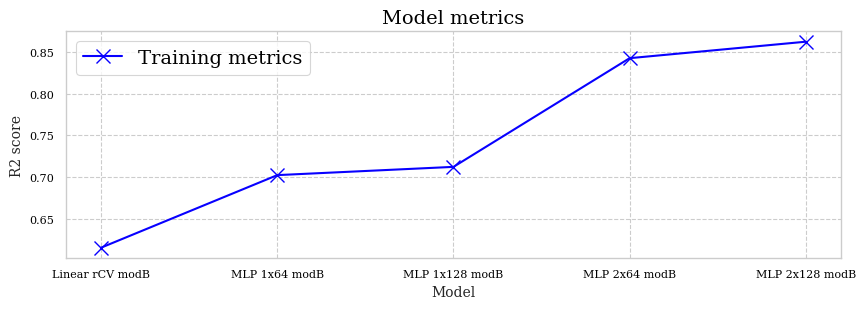

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
Model MLP 1x128 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble MLP 1x128 + Linear modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
    Trained weights for Linear model of ensemble:
[[ 0.94431587 -0.09092831]]
Model MLP 2x64 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble MLP 2x64 + Linear modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
    Trained weights for Linear model of ensemble:
[[0.86912902 0.06505359]]
+-----------------------------------------+-----------+-------------+---------------+--------+
|                  Model                  | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------------------+-----------+-------------+-

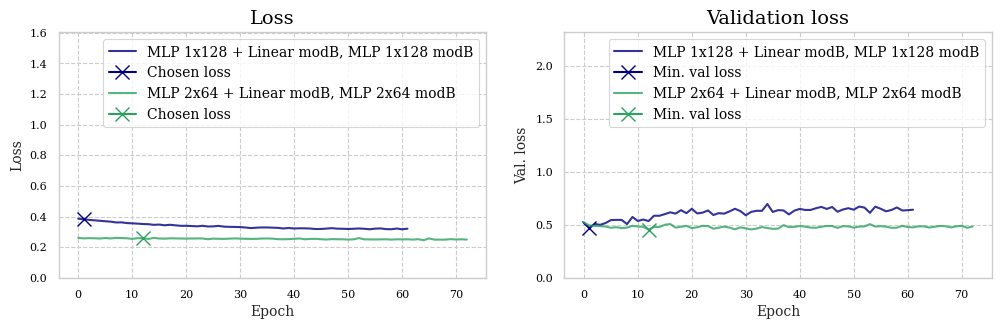

Model prediction scores
+-------------------------+-------------+------------+
|          Model          | Train score | Test score |
+-------------------------+-------------+------------+
|     Linear rCV modB     |    0.6158   |   0.5949   |
| MLP 1x128 + Linear modB |    0.7408   |   0.4816   |
|  MLP 2x64 + Linear modB |    0.8533   |   0.4566   |
+-------------------------+-------------+------------+


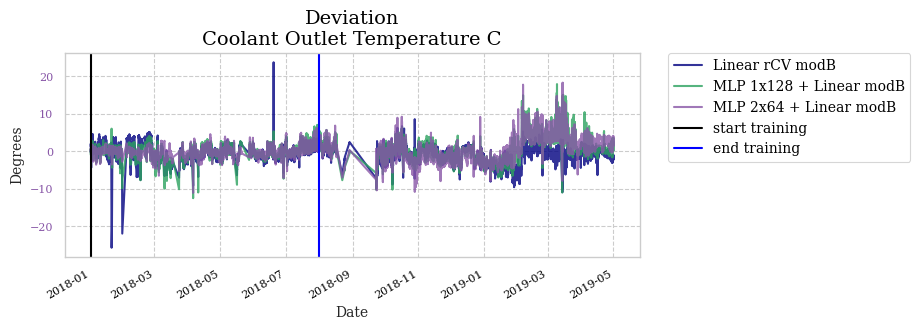

In [10]:
pred('F', 'B', '30min')

In [11]:
mlModule.reset()

# Dataset G, predictive model A, 30min

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
Model MLP 1x16 mo

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.562    |  -1.2036   |
|  MLP 1x16 modA  |    0.6375   |  -1.4638   |
|  MLP 1x32 modA  |    0.5594   |  -0.6723   |
|  MLP 2x16 modA  |    0.6118   |   -1.091   |
|  MLP 2x32 modA  |    0.6521   |  -1.1696   |
+-----------------+-------------+------------+


Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
Model MLP 1x64 modA was loaded from file
Model MLP 1x128 modA was loaded from file
Model MLP 2x64 modA was loaded from file
Model MLP 2x128 modA was loaded from file
+----------------+-----------+-------------+---------------+--------+
|     Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------+-----------+-------------+---------------+--------+
| MLP 1x64 modA  |  0.434783 |   0.494167  |    0.502826   |   67   |
| MLP 1x128 modA |  0.396757 |   0.410945  |    0.522357   |  115   |
| MLP 2x64 modA  |  0.387267 |    0.5095   |    0.493544   |   64   |
| MLP 2x128 modA |  0.358716 |   0.515264  |    0.498574   |   62   |
+----------------+-----------+-------------+---------------+--------+


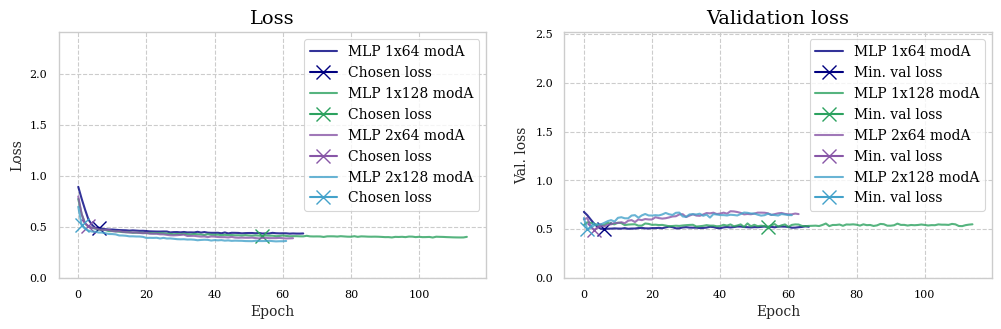

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.562    |  -1.2036   |
|  MLP 1x64 modA  |    0.6095   |  -0.8862   |
|  MLP 1x128 modA |    0.6795   |   -2.223   |
|  MLP 2x64 modA  |    0.6096   |  -0.8635   |
|  MLP 2x128 modA |    0.599    |  -1.2077   |
+-----------------+-------------+------------+


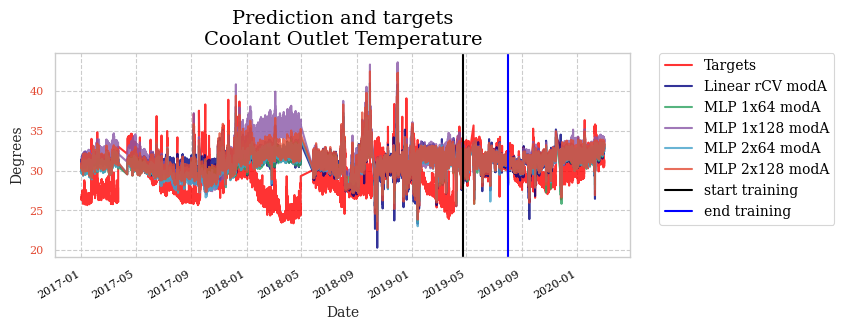

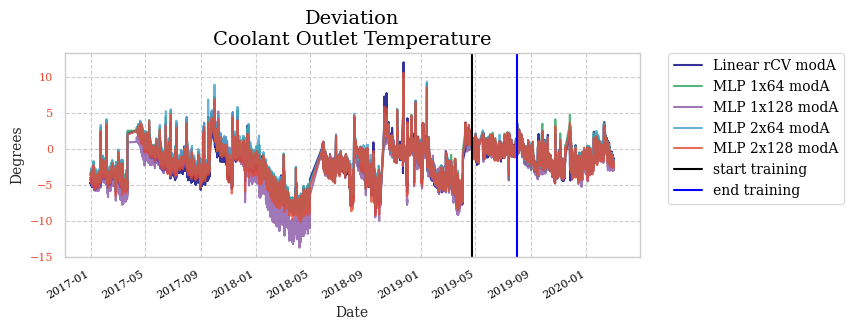

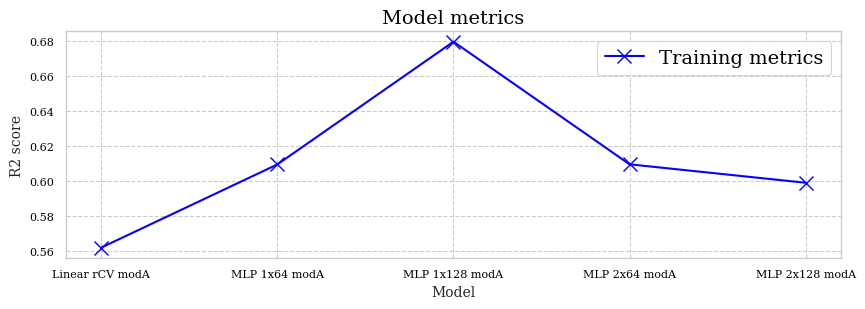

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
Model MLP 1x128 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble MLP 1x128 + Linear modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
    Trained weights for Linear model of ensemble:
[[ 0.85748724 -0.03238445]]
Model MLP 2x64 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble MLP 2x64 + Linear modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
    Trained weights for Linear model of ensemble:
[[ 0.79364139 -0.00769431]]
+-----------------------------------------+-----------+-------------+---------------+--------+
|                  Model                  | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------------------+-----------+-------------+---------------+--------+
| MLP 1x1

Model prediction scores
+-------------------------+-------------+------------+
|          Model          | Train score | Test score |
+-------------------------+-------------+------------+
|     Linear rCV modA     |    0.562    |  -1.2036   |
| MLP 1x128 + Linear modA |    0.6857   |  -2.4039   |
|  MLP 2x64 + Linear modA |    0.6183   |  -0.8168   |
+-------------------------+-------------+------------+


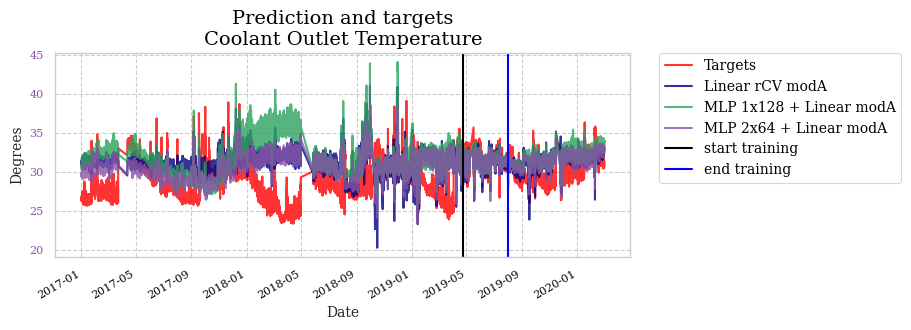

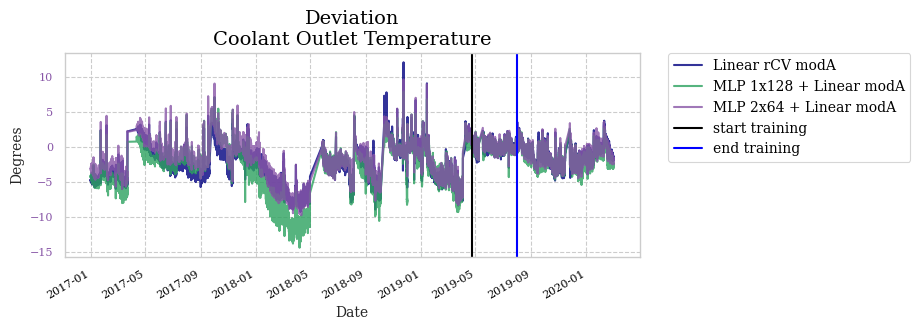

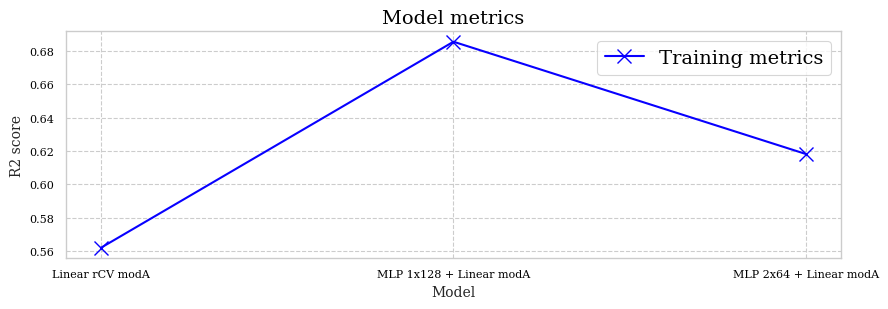

In [12]:
pred('G', 'A', '30min')

In [13]:
mlModule.reset()

# Dataset G, predictive model B, 30min

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature
Col. 5 : TIC0022U - Coolant Valve Opening

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.9235   |  -2.2699   |
|  MLP 1x16 modB  |    0.9284   |  -1.2298   |
|  MLP 1x32 modB  |    0.9322   |  -2.3419   |
|  MLP 2x16 modB  |    0.9199   |  -1.3605   |
|  MLP 2x32 modB  |    0.9357   |  -1.3944   |
+-----------------+-------------+------------+


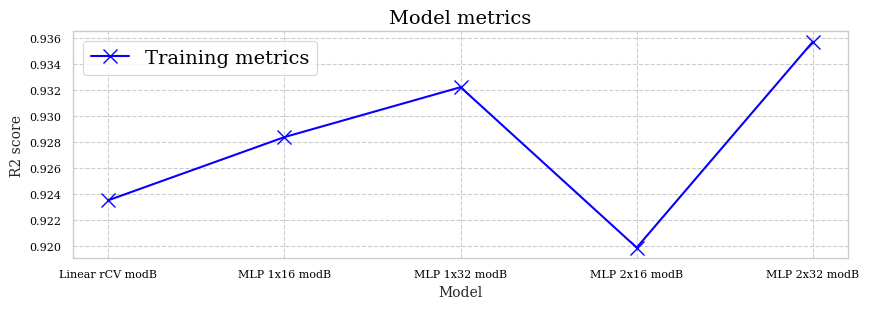

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
Model MLP 1x64 modB was loaded from file
Model MLP 1x128 modB was loaded from file
Model MLP 2x64 modB was loaded from file
Model MLP 2x128 modB was loaded from file
+----------------+-----------+-------------+---------------+--------+
|     Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------------+-----------+-------------+---------------+--------+
| MLP 1x64 modB  |  0.180428 |   0.201326  |    0.201367   |   99   |
| MLP 1x128 modB |  0.159878 |   0.164675  |    0.173586   |  287   |
| MLP 2x64 modB  |  0.177344 |   0.189377  |    0.196774   |  103   |
| MLP 2x128 modB |  0.156334 |   0.16465   |    0.188487   |  148   |
+----------------+-----------+-------------+---------------+--------+


Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.9235   |  -2.2699   |
|  MLP 1x64 modB  |    0.9421   |  -1.6834   |
|  MLP 1x128 modB |    0.9526   |  -1.6144   |
|  MLP 2x64 modB  |    0.9409   |  -1.2101   |
|  MLP 2x128 modB |    0.9486   |  -1.4694   |
+-----------------+-------------+------------+


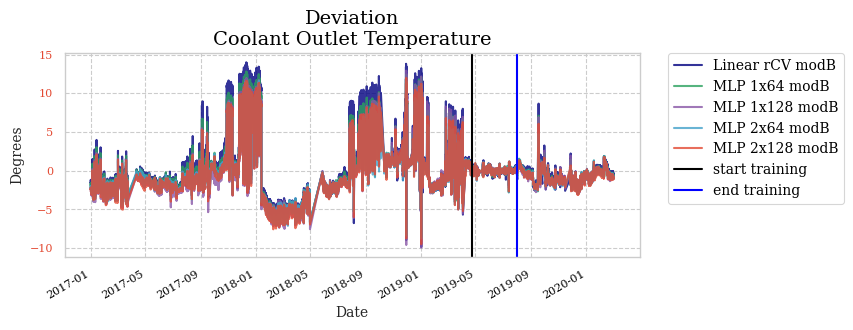

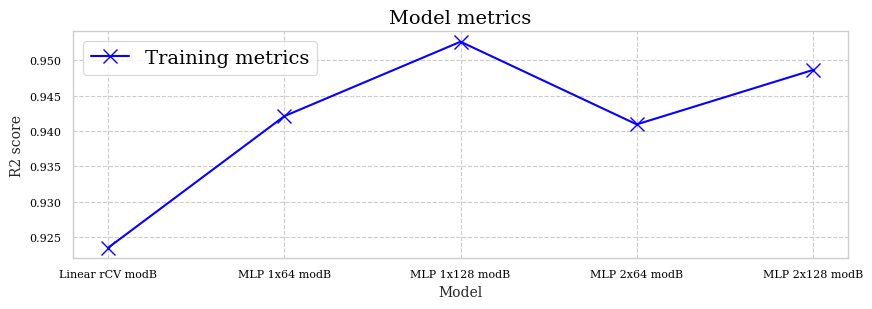

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
Model MLP 1x128 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble MLP 1x128 + Linear modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
    Trained weights for Linear model of ensemble:
[[0.95010207 0.02684712]]
Model MLP 2x64 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble MLP 2x64 + Linear modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
    Trained weights for Linear model of ensemble:
[[0.83674228 0.14144179]]
+-----------------------------------------+-----------+-------------+---------------+--------+
|                  Model                  | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------------------+-----------+-------------+---

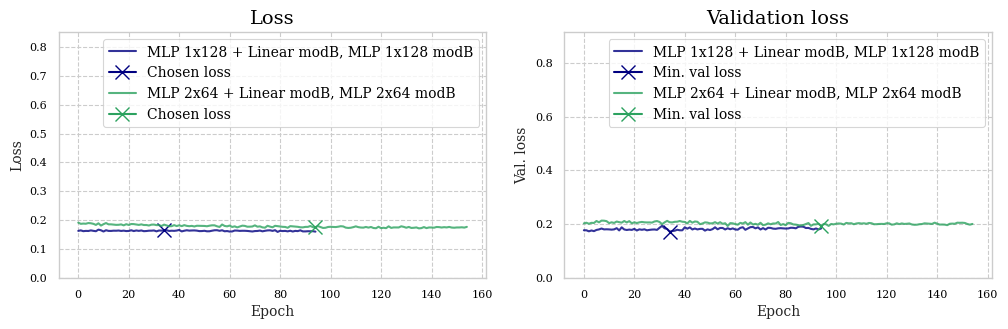

Model prediction scores
+-------------------------+-------------+------------+
|          Model          | Train score | Test score |
+-------------------------+-------------+------------+
|     Linear rCV modB     |    0.9235   |  -2.2699   |
| MLP 1x128 + Linear modB |    0.9536   |  -1.8752   |
|  MLP 2x64 + Linear modB |    0.952    |    -1.6    |
+-------------------------+-------------+------------+


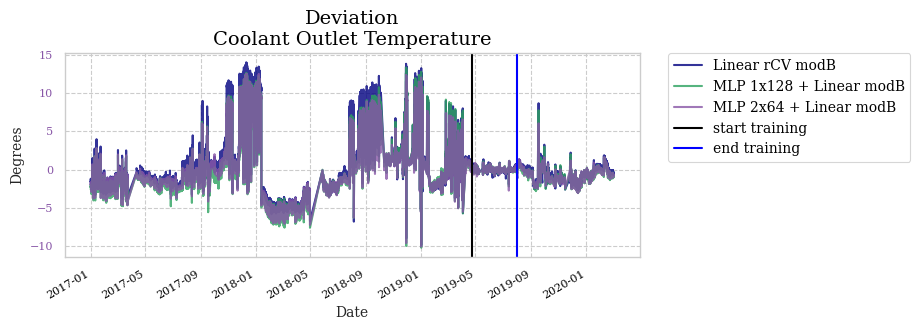

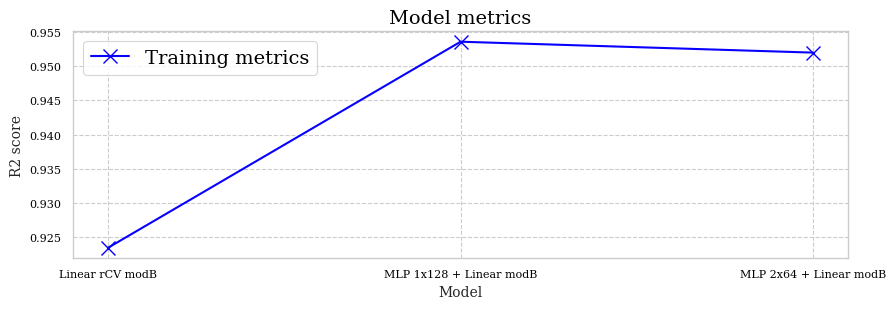

In [14]:
pred('G', 'B', '30min')

In [15]:
mlModule.reset()

# Conclusions
The architecture comparisons presented in this section intend to demonstrate that different architectures may converge to very different solutions, despite all other hyperparameters and training data remaining the same. Therefore, determining a general approach that works for a large number of use cases is very challenging, or even impossible. An architecture must be chosen which has a sufficient number of layers and neurons not to underfit, without excess parameters to avoid overfitting, while keeping training time complexity manageable. The applicable hidden layer sizes may be limited by the available hardware. Large networks generally require large amounts of data to avoid overfitting. Network architecture optimization in general is not yet well understood, hence it remains an empirical procedure. A limited grid search of one and two hidden layers is performed. Hyperparameters known to work well on the relevant datasets are chosen. Predictive model A is used.

Models with 16 neurons in each layer are generally found to have too little capacity, with higher validation loss and lower coefficient of determination than the more complex models of 64 and 128 neurons. Models with two hidden layer achieve higher performance for dataset F than models with a single hidden layers, while the opposite is found for dataset G. It is difficult to know in general whether the increase in model performance for higher capacity model is due to better model fit or model overfitting. Recall that models with many hidden layers and a large number of units in each layer have a large number of parameters, making such models capable of remembering the data rather than learning to generalize.

Training of models with multiple hidden layers is found to be more time consuming than single layer architectures. For dataset F in particular, the models with two hidden layers require between two and three times as many epochs to reach its minimal validation loss, while also requiring more time for each individual epoch. Training times for facility G are more similar between the different architectures.